<a href="https://colab.research.google.com/github/AlbaDu/SAS_VIYA_Course/blob/main/LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

In [15]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
rng = np.random

# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167, 7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221, 2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [5]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [12]:
#Linear regression (Wx + b).
def linear_regression(x):
  return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

# Optimization process.
def run_optimization():
  # Wrap computation inside a GradientTape for automatic differentiation.
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
  # Compute gradients.
  gradients = g.gradient(loss, [W, b])
  # Update W and b following gradients.
  optimizer.apply_gradients(zip(gradients, [W, b])) 

In [14]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
# Run the optimization to update W and b values.
  run_optimization()
  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))  

step: 50, loss: 0.273440, W: 0.390265, b: -0.184025
step: 100, loss: 0.247637, W: 0.374401, b: -0.071554
step: 150, loss: 0.227402, W: 0.360352, b: 0.028046
step: 200, loss: 0.211533, W: 0.347911, b: 0.116248
step: 250, loss: 0.199088, W: 0.336893, b: 0.194356
step: 300, loss: 0.189328, W: 0.327137, b: 0.263527
step: 350, loss: 0.181674, W: 0.318497, b: 0.324781
step: 400, loss: 0.175672, W: 0.310845, b: 0.379026
step: 450, loss: 0.170965, W: 0.304070, b: 0.427063
step: 500, loss: 0.167274, W: 0.298069, b: 0.469604
step: 550, loss: 0.164379, W: 0.292755, b: 0.507276
step: 600, loss: 0.162109, W: 0.288050, b: 0.540637
step: 650, loss: 0.160328, W: 0.283883, b: 0.570180
step: 700, loss: 0.158932, W: 0.280192, b: 0.596342
step: 750, loss: 0.157837, W: 0.276924, b: 0.619511
step: 800, loss: 0.156979, W: 0.274030, b: 0.640028
step: 850, loss: 0.156305, W: 0.271467, b: 0.658198
step: 900, loss: 0.155777, W: 0.269198, b: 0.674288
step: 950, loss: 0.155363, W: 0.267188, b: 0.688537
step: 1000,

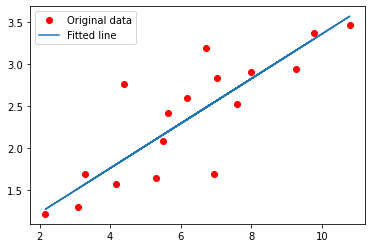

In [16]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()